## Import Modules

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Dataset

In [286]:
df = pd.read_csv('TRAIN.csv')
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [287]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [288]:
df.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [290]:
df.apply(lambda x: len(x.unique()))

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

## Pre-processing

In [291]:
# categorical values
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
cat_col

['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Discount']

In [292]:
cat_col.remove('ID')
cat_col.remove('Date')

In [293]:
cat_col
cat_col.append('Holiday')
cat_col

['Store_Type', 'Location_Type', 'Region_Code', 'Discount', 'Holiday']

In [294]:
cat_col.append('Store_id')

In [295]:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

Discount
No     104051
Yes     84289
Name: Discount, dtype: int64

Holiday
0    163520
1     24820
Name: Holiday, dtype: int64

Store_id
128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64



# Creating Attribute

In [296]:
df['Date'] = pd.to_datetime(df['Date'])

In [297]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


## Visualization

<AxesSubplot:xlabel='Store_Type'>

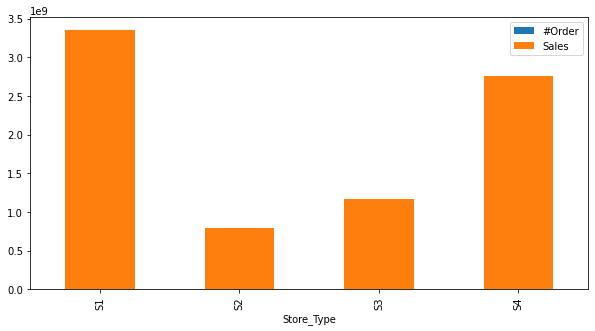

In [299]:
df.groupby('Store_Type')['#Order','Sales'].sum()
df.groupby('Store_Type')['#Order','Sales'].sum().plot(kind='bar',figsize=(10, 5),stacked=True)

<AxesSubplot:xlabel='Region_Code'>

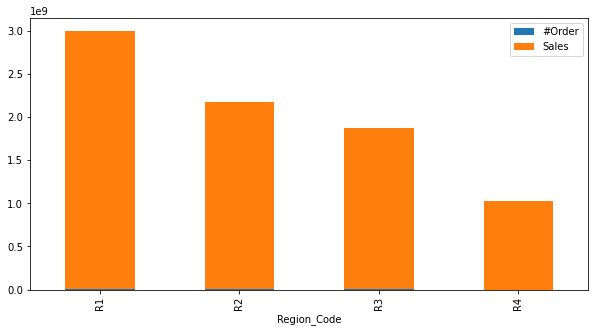

In [310]:
df.groupby('Region_Code')['#Order','Sales'].sum().plot(kind='bar',figsize=(10, 5),stacked=True)

<AxesSubplot:xlabel='Date'>

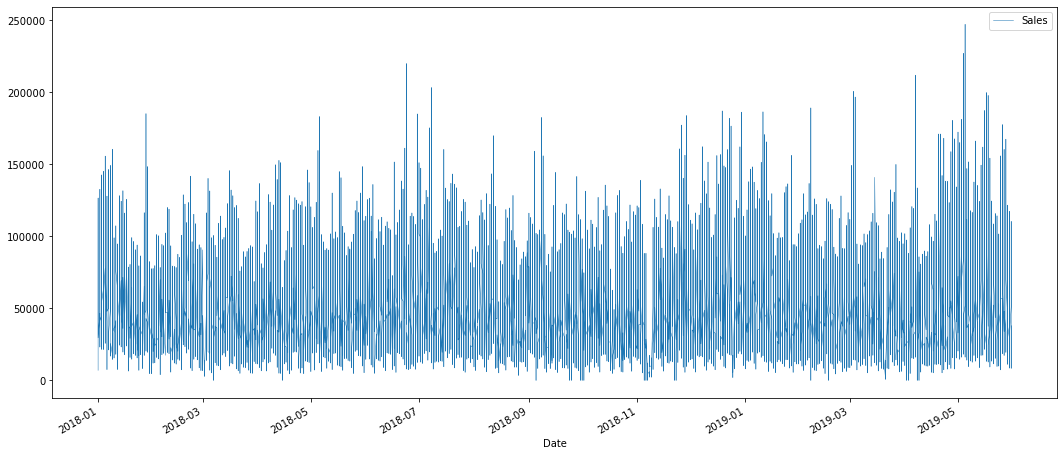

In [300]:
df.plot(x='Date',y='Sales',figsize=(18, 8),linewidth=0.5)

<AxesSubplot:xlabel='Location_Type'>

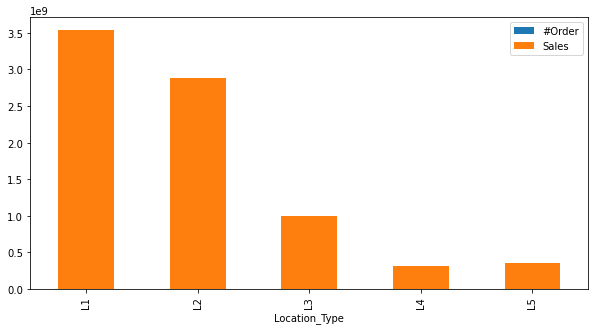

In [313]:
df.groupby('Location_Type')['#Order','Sales'].sum().plot(kind='bar',figsize=(10, 5),stacked=True)

<AxesSubplot:xlabel='Date'>

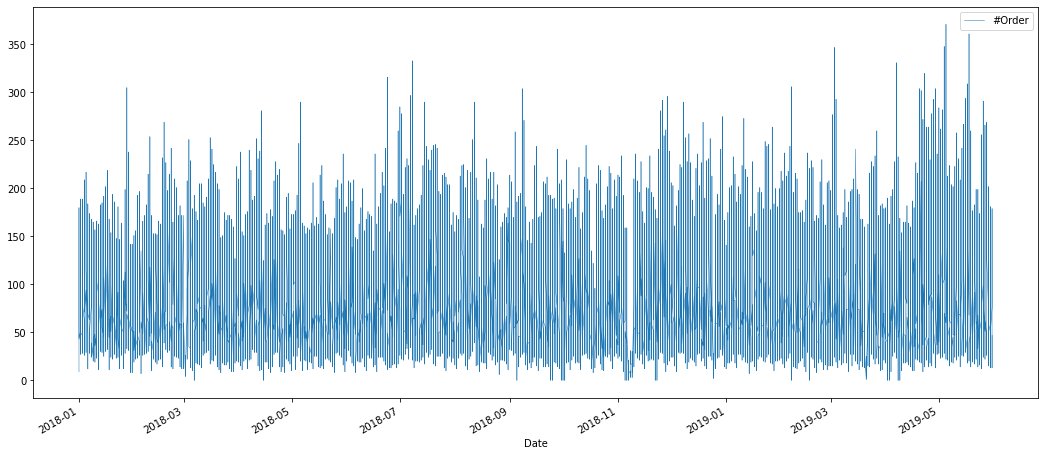

In [301]:
df.plot(x='Date',y='#Order',figsize=(18, 8),linewidth=0.5)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

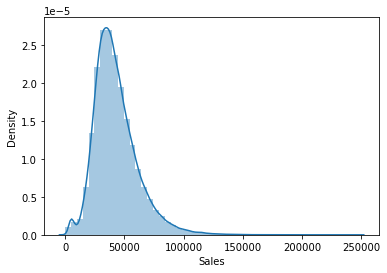

In [302]:
sns.distplot(df['Sales'])

<AxesSubplot:xlabel='Holiday'>

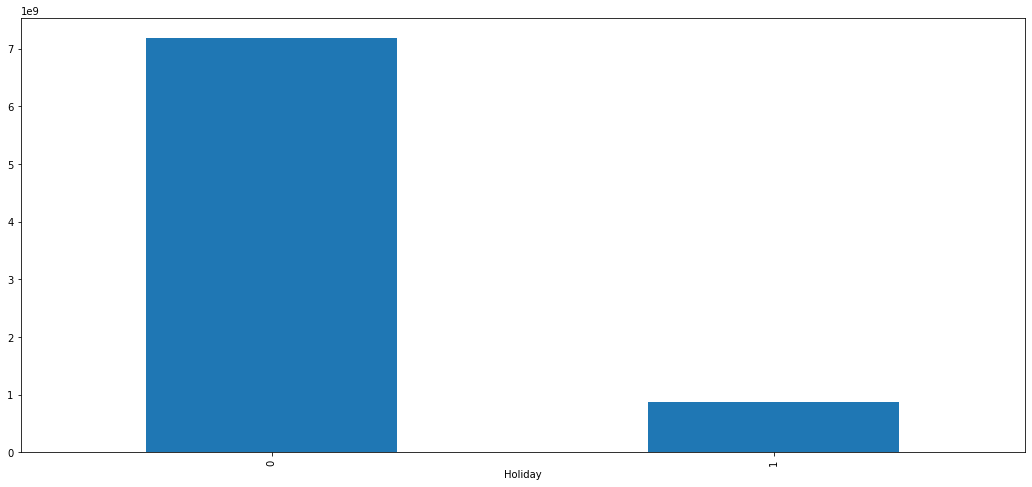

In [303]:
df.groupby('Holiday')['Sales'].sum().plot(kind='bar',figsize=(18, 8))

<AxesSubplot:xlabel='Discount'>

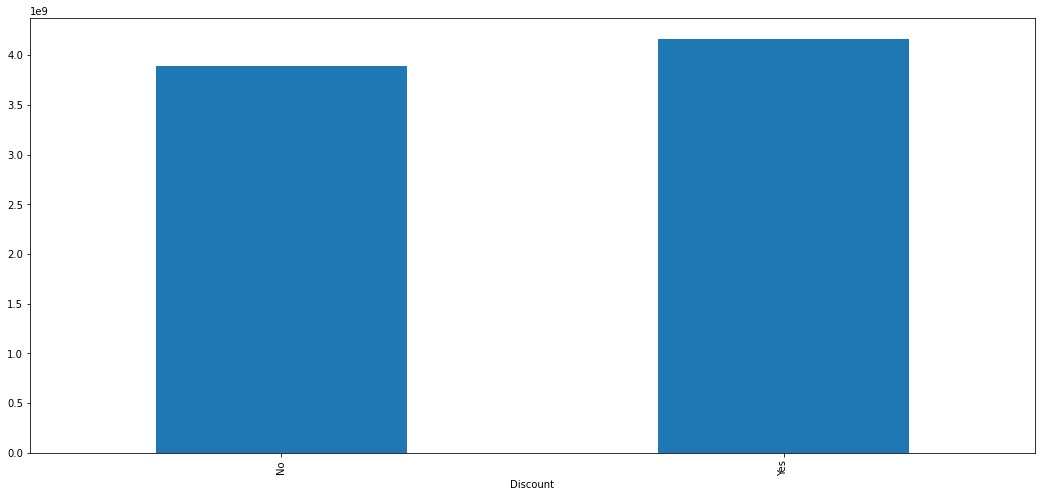

In [304]:
df.groupby('Discount')['Sales'].sum().plot(kind='bar',figsize=(18, 8))

## Feature Engineering

In [305]:
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day'] = df['Date'].dt.day

df['dayofweek_num'] = df['Date'].dt.dayofweek  

df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,month,day,dayofweek_num
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,2019,5,31,4
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,2019,5,31,4
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,2019,5,31,4
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,2019,5,31,4


In [306]:
df['Date'].min(), df['Date'].max(), (df['Date'].max() -df['Date'].min())

(Timestamp('2018-01-01 00:00:00'),
 Timestamp('2019-05-31 00:00:00'),
 Timedelta('515 days 00:00:00'))

## Corelation

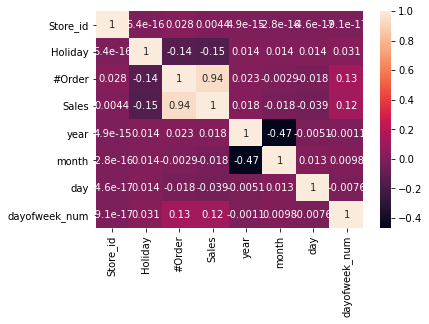

In [307]:
corr = sns.heatmap(df.corr(), annot=True)

In [273]:
# one-hot encoding
df = pd.get_dummies(df,columns=['Store_Type','Location_Type','Region_Code','Discount','Holiday'])
df

,ID,Store_id,Date,#Order,Sales,year,month,day,dayofweek_num,Store_Type_S1,...,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Holiday_0,Holiday_1
0,T1000001,1,2018-01-01,9,7011.84,2018,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1
1,T1000002,253,2018-01-01,60,51789.12,2018,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,T1000003,252,2018-01-01,42,36868.20,2018,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
3,T1000004,251,2018-01-01,23,19715.16,2018,1,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,T1000005,250,2018-01-01,62,45614.52,2018,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,2019-05-31,51,37272.00,2019,5,31,4,0,...,0,0,0,1,0,0,0,1,0,1
188336,T1188337,153,2019-05-31,90,54572.64,2019,5,31,4,0,...,0,0,1,0,0,0,1,0,0,1
188337,T1188338,154,2019-05-31,56,31624.56,2019,5,31,4,1,...,0,0,0,1,0,0,1,0,0,1
188338,T1188339,155,2019-05-31,70,49162.41,2019,5,31,4,0,...,0,0,0,1,0,0,0,1,0,1


## Input Split

In [274]:
X= df.drop(columns = ['ID','Store_id','#Order','Sales','Date'])
X

,year,month,day,dayofweek_num,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,...,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Holiday_0,Holiday_1
0,2018,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,2018,1,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
2,2018,1,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,1
3,2018,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,2018,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,2019,5,31,4,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
188336,2019,5,31,4,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
188337,2019,5,31,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
188338,2019,5,31,4,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [275]:
y=df['Sales']
y

0          7011.84
1         51789.12
2         36868.20
3         19715.16
4         45614.52
            ...   
188335    37272.00
188336    54572.64
188337    31624.56
188338    49162.41
188339    37977.00
Name: Sales, Length: 188340, dtype: float64

## Model Training

In [276]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perfrom cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_log_error')
    
    print("Model Report")
    print("MSLE:",mean_squared_log_error(y,pred))
    print("CV Score:", cv_score)
    print("Accuracy:", cv_score.mean() * 100)

Model Report
MSLE: 0.11514470845944266
CV Score: [-0.10793888 -0.06837485 -0.09299769 -0.19397666 -0.12504224]
Accuracy: -11.766606550868781


<AxesSubplot:title={'center':'Model Coeffecients'}>

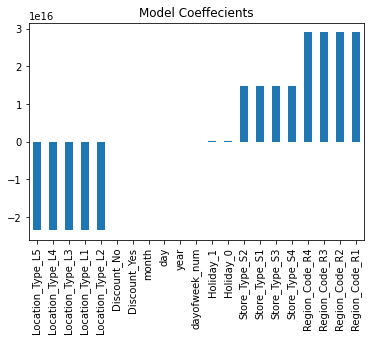

In [282]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coeffecients")

# Predicting

In [278]:
df_predict = pd.read_csv('TEST_FINAL.csv')
df_predict['Date'] = pd.to_datetime(df_predict['Date'])


df_predict['year'] = df_predict['Date'].dt.year 
df_predict['month'] = df_predict['Date'].dt.month 
df_predict['day'] = df_predict['Date'].dt.day
df_predict['dayofweek_num'] = df_predict['Date'].dt.dayofweek
  

df_predict.drop(columns=['ID','Store_id','Date'],inplace=True)

df_predict = pd.get_dummies(df_predict,columns=['Store_Type','Location_Type','Region_Code','Discount','Holiday'])
df_predict

,year,month,day,dayofweek_num,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,...,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Holiday_0,Holiday_1
0,2019,6,1,5,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
1,2019,6,1,5,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,2019,6,1,5,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
3,2019,6,1,5,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,2019,6,1,5,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,2019,7,31,2,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
22261,2019,7,31,2,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
22262,2019,7,31,2,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
22263,2019,7,31,2,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0


In [279]:
y_predict = model.predict(df_predict)
df_predict.loc[:,'Prediction'] = y_predict
df_predict

,year,month,day,dayofweek_num,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,...,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Holiday_0,Holiday_1,Prediction
0,2019,6,1,5,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,61752.0
1,2019,6,1,5,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,38488.0
2,2019,6,1,5,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,62628.0
3,2019,6,1,5,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,37344.0
4,2019,6,1,5,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,37844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,2019,7,31,2,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,18696.0
22261,2019,7,31,2,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,58428.0
22262,2019,7,31,2,1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,45556.0
22263,2019,7,31,2,1,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,33144.0


In [280]:
df_predict.to_csv('Linear_Regression_Sub5csv')